In [4]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [5]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


#Since there are no null values, there is no need for imputation/deletion of rows.


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [20]:
#Standardization of Columns
df['job'] = df['job'].str.lower().str.strip()
df['marital'] = df['marital'].str.lower().str.strip()
df['education'] = df['education'].str.lower().str.strip()
df['default'] = df['default'].str.lower().str.strip()
df['housing'] = df['housing'].str.lower().str.strip()
df['loan'] = df['loan'].str.lower().str.strip()
df['contact'] = df['contact'].str.lower().str.strip()
df['month'] = df['month'].str.lower().str.strip()
df['poutcome'] = df['poutcome'].str.lower().str.strip()
df['y'] = df['y'].str.lower().str.strip()


In [21]:
#Encoding Y
df = pd.get_dummies(df, columns = ['y'], prefix='y')

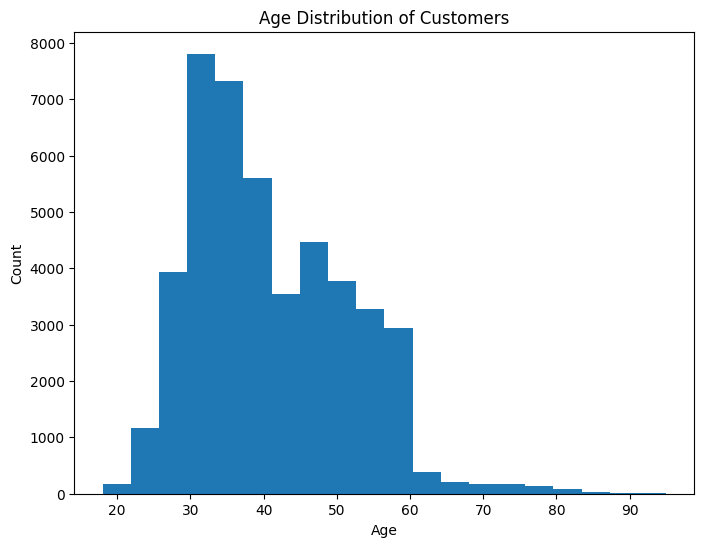

In [25]:
#EDA

#Analysing Age Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
plt.hist(df['age'], bins = 20)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#Most Customers are aged between 30-40


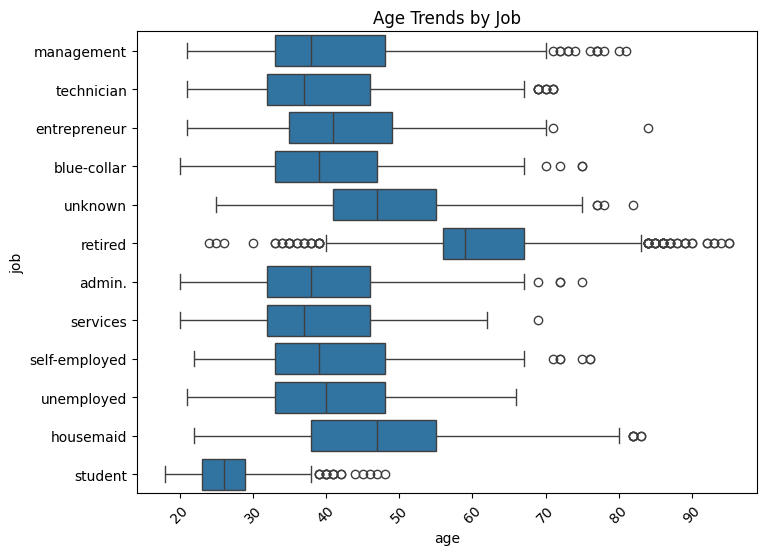

In [27]:
#Age Trends by Job
plt.figure(figsize=(8,6))
sns.boxplot(x = 'age', y = 'job', data = df)
plt.xticks(rotation=45)
plt.title('Age Trends by Job')
plt.show()

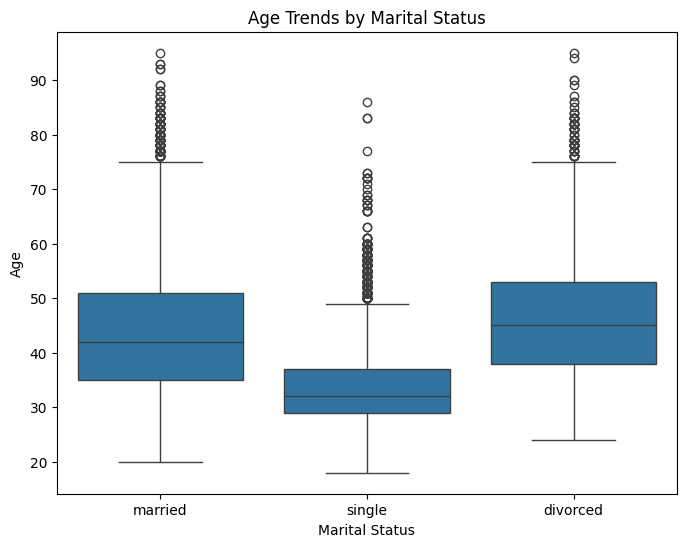

In [30]:
#Age Trends by Marital Status
plt.figure(figsize=(8,6))
sns.boxplot(x='marital', y ='age', data=df)
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.title('Age Trends by Marital Status')
plt.show()

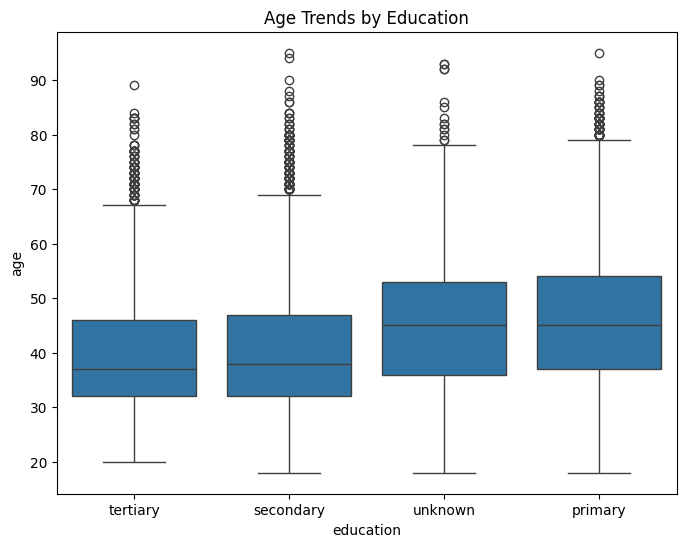

In [31]:
#Age Trends by Education
plt.figure(figsize=(8,6))
sns.boxplot(x='education', y='age', data=df)
plt.title('Age Trends by Education')
plt.show()

In [33]:
#Summary
df.groupby(['job', 'education', 'marital'])['age'].mean().sort_values(ascending=False).head(10)

job      education  marital 
retired  unknown    divorced    70.769231
         primary    divorced    65.956790
         unknown    married     65.851485
         tertiary   married     62.925197
         primary    married     62.290698
         tertiary   single      61.037037
         secondary  divorced    60.527273
                    married     60.416021
         tertiary   divorced    59.929412
unknown  unknown    divorced    59.428571
Name: age, dtype: float64

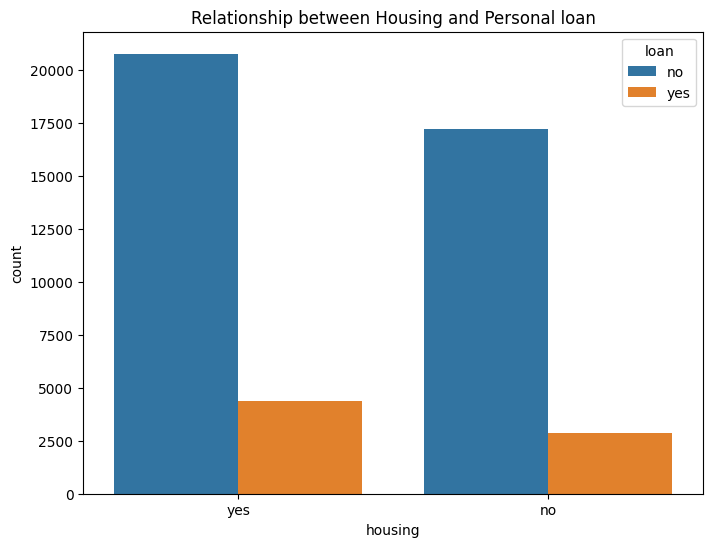

In [41]:
#Relation between housing loan and personal loan
pd.crosstab(df['housing'], df['loan'],normalize='index') * 100
plt.figure(figsize=(8,6))
sns.countplot(x='housing', hue='loan', data=df)
plt.title('Relationship between Housing and Personal loan')
plt.show()

This shows that a limited % of people have both housing and personal loan


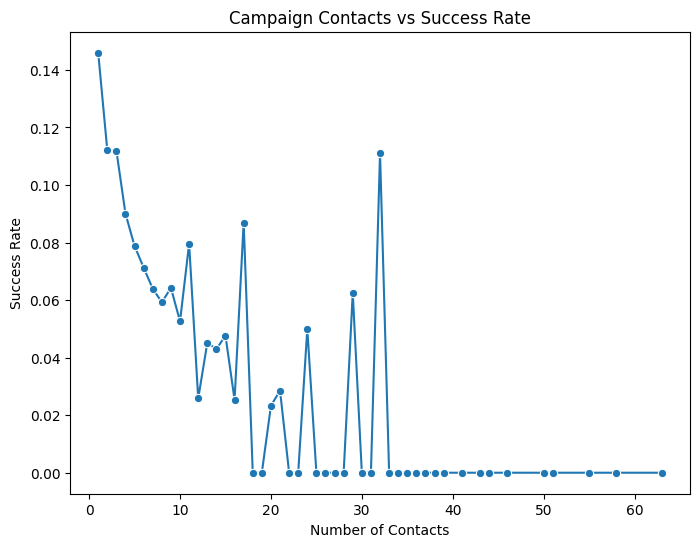

In [44]:
success_rate = df.groupby(['campaign'])['y_yes'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.lineplot(x='campaign',y='y_yes',data=success_rate,marker='o')
plt.xlabel('Number of Contacts')
plt.ylabel('Success Rate')
plt.title('Campaign Contacts vs Success Rate')
plt.show()


The above lineplot shows that success rate is consistent when the number of contacts are close to 20, however after 20 it shows a steep drop and incline leading to major inconsistencies, post approximately 35 contacts, success rate remains 0


In [48]:
#Statistical Analysis

#Hypothesis Testing Using T-Test

from scipy.stats import ttest_ind

group_yes = df[df['housing']=='yes']['balance']
group_no = df[df['housing']=='no']['balance']
t_stat, p_value = ttest_ind(group_yes, group_no, equal_var=False)
print(f'T - Stat: {t_stat:.3f}')
print(f'P-value:: {p_value:.2f}')

T - Stat: -14.081
P-value:: 0.00


Since P-value is < 0.05 we reject the null hypothesis and come to the conclusion that there is a statistically significant difference in the average balance of clients with and without a housing loan


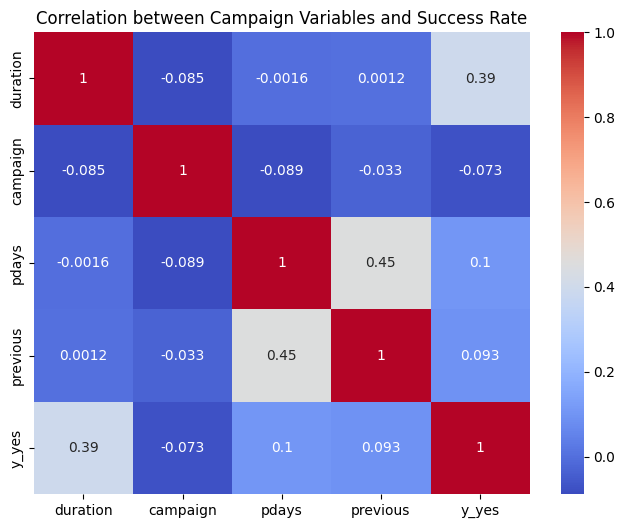

In [51]:
#Correaltion Analysis
#Analysing the Correlation between campaign Variables with HeatMap
campaign_var = ['duration', 'campaign', 'pdays', 'previous', 'y_yes']
corr = df[campaign_var].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True,cmap='coolwarm')
plt.title('Correlation between Campaign Variables and Success Rate')
plt.show()


In [52]:
#ML Classification model
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Encode categorical columns
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop(['y_yes', 'y_no'], axis=1)
y = df_encoded['y_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.885104500718788
Precision: 0.5673575129533679
Recall: 0.20073327222731438

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.98      0.94      7952
        True       0.57      0.20      0.30      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.59      0.62      9043
weighted avg       0.86      0.89      0.86      9043



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
